# Forecast Bus Ridership 

In [1]:
import numpy as np
import pandas as pd
from itertools import product
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation, performance_metrics

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)

## Import data 

In [3]:
df = pd.read_csv('portland-oregon-average-monthly-.csv')
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,114.0,1120.54386,270.888317,613.0,885.0,1158.0,1340.0,1558.0


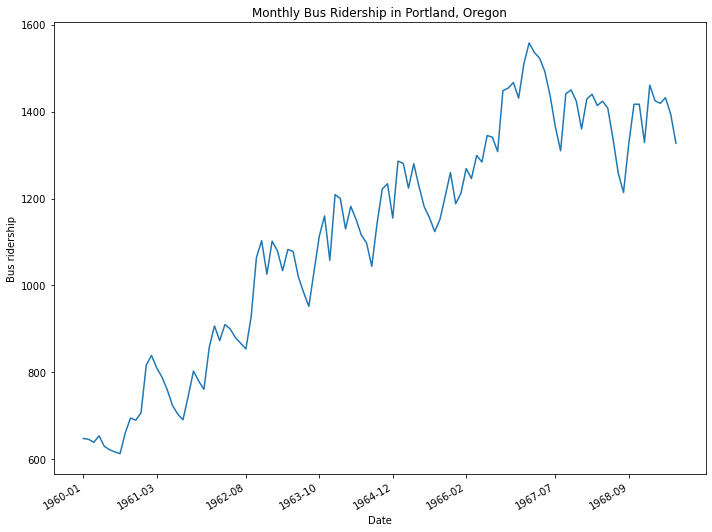

In [6]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()

ax.plot(df.ds, df.y)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel('Date')
ax.set_ylabel('Bus ridership')

ax.set_title('Monthly Bus Ridership in Portland, Oregon')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## Hyperparameter tuning 

In [7]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

rmses = []

for param in params:
    m = Prophet(**param)
    m.add_country_holidays(country_name='US')
    m.fit(df)
    
    df_cv = cross_validation(m, initial='1100 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['rmse'] = rmses

best_params = params[np.argmin(rmses)]

print(best_params)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}


## Fit best model 

In [9]:
m = Prophet(
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=0.1
)
m.add_country_holidays(country_name='US')
m.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Make forecasts 

In [16]:
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
121,1970-01-31
122,1970-02-28
123,1970-03-31
124,1970-04-30
125,1970-05-31


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,1970-01-31,1667.197991,1565.374318,1773.465624
122,1970-02-28,1641.677183,1542.231747,1743.952576
123,1970-03-31,1665.466805,1568.571299,1763.898850
124,1970-04-30,1637.467310,1541.342028,1743.818338
125,1970-05-31,1602.819499,1494.721160,1714.145726


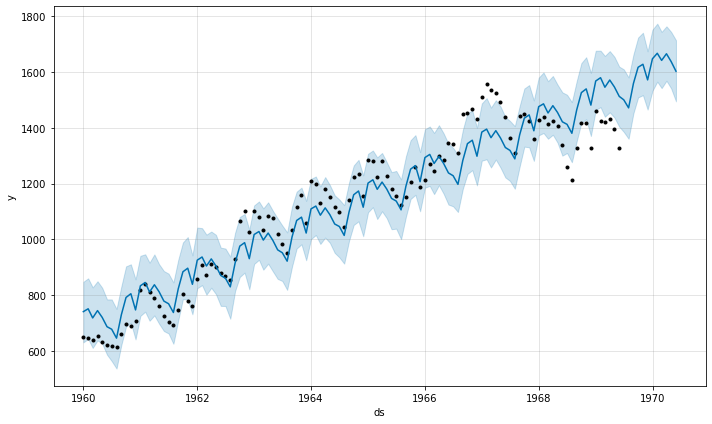

In [18]:
forecast_fig = m.plot(forecast)

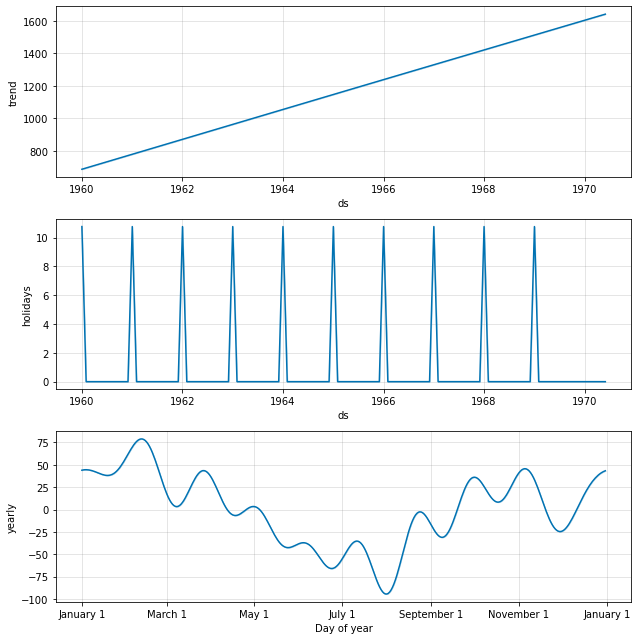

In [19]:
components_fig = m.plot_components(forecast)

## Performance metrics 

INFO:fbprophet:Making 11 forecasts with cutoffs between 1963-06-28 00:00:00 and 1968-06-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

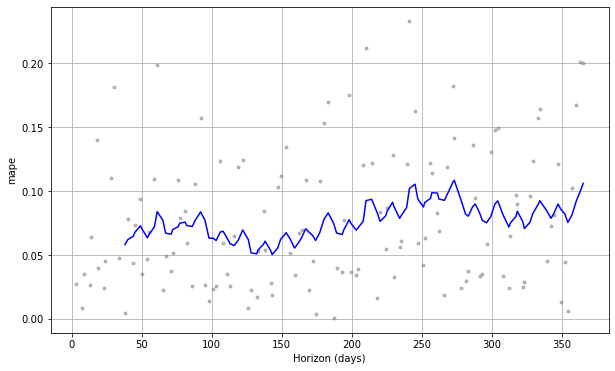

In [20]:
df_cv = cross_validation(m, initial='1100 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)

fig = plot_cross_validation_metric(df_cv, metric='mape')